In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv(r"/content/data_new.csv")

In [ ]:
data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_HOUSE_YRS,Income_norm,Profession Group_artist,Profession Group_business,...,Region_Center,Region_East,Region_North,Region_Northeast,Region_South,Region_West,Risk_Class,Age_Group,Income_Group,Experience_Group
0,1303834,23,3,1,2,0,13,0.129487,0,0,...,1,0,0,0,0,0,False,YoungAdult,rendah,baru
1,7574516,40,10,1,2,0,13,0.757206,0,0,...,0,0,0,0,0,1,False,Adult,tinggi,sangat berpengalaman
2,3991815,66,4,0,2,0,10,0.398564,0,0,...,0,0,0,0,1,0,False,Elderly,rendah,baru
3,6256451,41,2,1,2,1,12,0.625263,0,0,...,0,1,0,0,0,0,True,Adult,sedang,baru
4,5768871,47,11,1,2,0,14,0.576454,0,0,...,0,0,0,0,1,0,True,Elderly,sedang,sangat berpengalaman


In [ ]:
# Melakukan Encoding

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for cat in ['Age_Group', 'Experience_Group']:
    onehots = pd.get_dummies(data[cat], prefix=cat)
    data = data.join(onehots)

In [ ]:
data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_HOUSE_YRS,Income_norm,Profession Group_artist,Profession Group_business,...,Risk_Class,Age_Group,Income_Group,Experience_Group,Age_Group_Adult,Age_Group_Elderly,Age_Group_YoungAdult,Experience_Group_baru,Experience_Group_berpengalaman,Experience_Group_sangat berpengalaman
0,1303834,23,3,1,2,0,13,0.129487,0,0,...,False,YoungAdult,rendah,baru,0,0,1,1,0,0
1,7574516,40,10,1,2,0,13,0.757206,0,0,...,False,Adult,tinggi,sangat berpengalaman,1,0,0,0,0,1
2,3991815,66,4,0,2,0,10,0.398564,0,0,...,False,Elderly,rendah,baru,0,1,0,1,0,0
3,6256451,41,2,1,2,1,12,0.625263,0,0,...,True,Adult,sedang,baru,1,0,0,1,0,0
4,5768871,47,11,1,2,0,14,0.576454,0,0,...,True,Elderly,sedang,sangat berpengalaman,0,1,0,0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331506 entries, 0 to 331505
Data columns (total 29 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Income                                 331506 non-null  int64  
 1   Age                                    331506 non-null  int64  
 2   Experience                             331506 non-null  int64  
 3   Married/Single                         331506 non-null  int64  
 4   House_Ownership                        331506 non-null  int64  
 5   Car_Ownership                          331506 non-null  int64  
 6   CURRENT_HOUSE_YRS                      331506 non-null  int64  
 7   Income_norm                            331506 non-null  float64
 8   Profession Group_artist                331506 non-null  int64  
 9   Profession Group_business              331506 non-null  int64  
 10  Profession Group_service               331506 non-null  

In [ ]:
data = data.drop(['Income_Group', 'Age_Group', 'Experience_Group'], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331506 entries, 0 to 331505
Data columns (total 26 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Income                                 331506 non-null  int64  
 1   Age                                    331506 non-null  int64  
 2   Experience                             331506 non-null  int64  
 3   Married/Single                         331506 non-null  int64  
 4   House_Ownership                        331506 non-null  int64  
 5   Car_Ownership                          331506 non-null  int64  
 6   CURRENT_HOUSE_YRS                      331506 non-null  int64  
 7   Income_norm                            331506 non-null  float64
 8   Profession Group_artist                331506 non-null  int64  
 9   Profession Group_business              331506 non-null  int64  
 10  Profession Group_service               331506 non-null  

### Split data Train & Test

In [ ]:
X = data.drop(columns=['Risk_Class', 'Income'])
y = data['Risk_Class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Fit Model (RandomForestClassifier)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

In [ ]:
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(RandomForestClassifier(), X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): '+ str(score['train_score'].mean()))
    print('recall (crossval test): '+ str(score['test_score'].mean()))

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
eval_classification(rf_model)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.84
Recall (Test Set): 0.93
F1-Score (Test Set): 0.88
roc_auc (test-proba): 0.96
roc_auc (train-proba): 0.97
recall (crossval train): 0.9971742542885863
recall (crossval test): 0.9251132286350549


### Hyperparameter Tuning

In [ ]:
hyperparameters = {
    'n_estimators': [1, 110],
    'max_depth': [1, 30],
    'min_samples_split': [1, 10],
    'min_samples_leaf': [1, 10]
}

In [ ]:
# Inisialisasi Model
dt_model = RandomForestClassifier(random_state=42)
model = GridSearchCV(dt_model, hyperparameters, cv=5, scoring='recall')
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [1, 30], 'min_samples_leaf': [1, 10],
                         'min_samples_split': [1, 10],
                         'n_estimators': [1, 110]},
             scoring='recall')

In [ ]:
# Predict & Evaluation
y_pred = model.predict(X_test)
eval_classification(model)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.84
Recall (Test Set): 0.92
F1-Score (Test Set): 0.88
roc_auc (test-proba): 0.96
roc_auc (train-proba): 0.97
recall (crossval train): 0.9971697295040791
recall (crossval test): 0.9251494252732366


In [ ]:
# Lakukan pencarian hiperparameter pada data pelatihan
model.fit(X_train, y_train)

# Dapatkan model terbaik, parameter terbaik, dan skor terbaik
best_model = model.best_estimator_
best_params = model.best_params_
best_score = model.best_score_

# Cetak hasilnya
print("Best Model:", best_model)
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Model: RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=110,
                       random_state=42)
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 110}
Best Score: 0.9222816130971265


### Feature Importance

In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 6))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

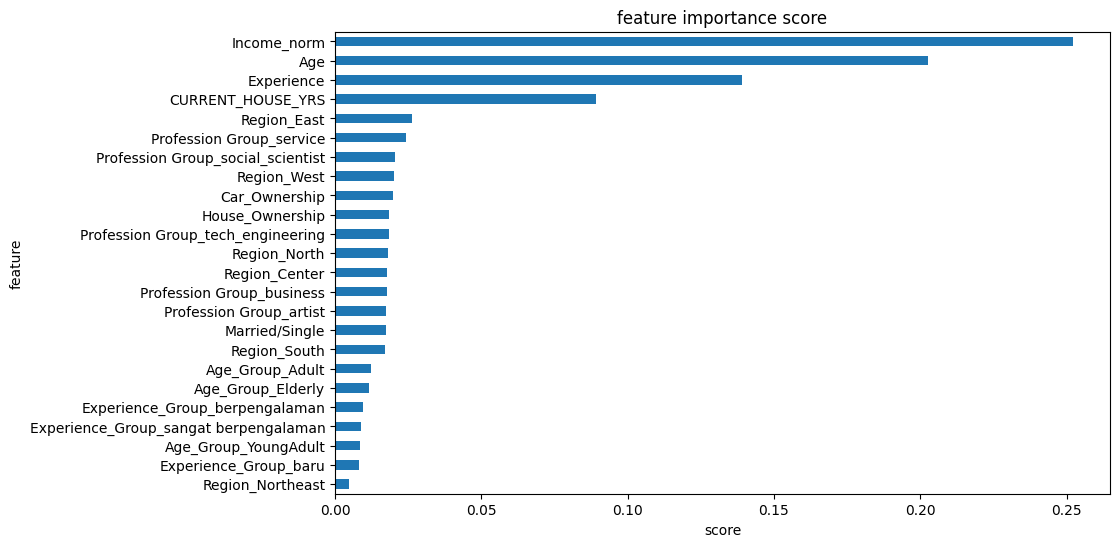

In [ ]:
show_feature_importance(model.best_estimator_)